In [112]:
import numpy as np
import networkx as nx
import plotly as py
import matplotlib.pyplot as plt
import scipy.linalg as la

In [23]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])

In [25]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)

In [27]:
G.add_edges_from([(1,2),(1,3)])


In [29]:
G.clear()

In [30]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3,'m')

In [10]:
G.number_of_nodes()

8

In [32]:
G.number_of_edges()

3

In [12]:
list(G.nodes)

[1, 2, 3, 'p', 'spam', 's', 'a', 'm']

In [13]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

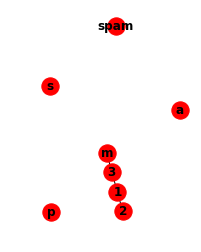

In [31]:
plt.subplot(1)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


Now when we're good in drawing the graphs, let's start Lecture 12.

In [48]:
G.clear()
G = nx.DiGraph()

In [49]:
G.add_nodes_from([1,2,3,4])

In [50]:
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4)])

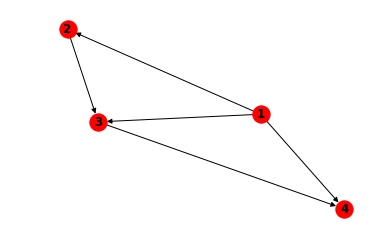

In [51]:
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [52]:
n=4 #nodes - columns
m=5 #edges - rows

Incidence matrix: every row is an edge;

In [64]:
A = np.array([[-1,1,0,0],
             [0,-1,1,0],
             [-1,0,1,0],
             [-1,0,0,1],
             [0,0,-1,1]])

Loops correspond to linearly dependent rows.

In [68]:
Anx = np.array(nx.incidence_matrix(G, oriented = True).todense().T)

By default networkx builds an incedence matrix with columns as edges and rows as nodes, as opposed to what we see in MIT lectures.

haha, we can transpose easier by A.T

In [75]:
A.T

array([[-1,  0, -1, -1,  0],
       [ 1, -1,  0,  0,  0],
       [ 0,  1,  1,  0, -1],
       [ 0,  0,  0,  1,  1]])

In [76]:
Anx.T

array([[-1., -1., -1.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  1., -1.],
       [ 0.,  0.,  1.,  0.,  1.]])

In [110]:
z=np.zeros(5)

Ax = 0

In [101]:
x = np.array([1,1,1,1])

In [103]:
np.dot(A,x)

array([[0],
       [0],
       [0],
       [0],
       [0]])

x - is a nullspace basis

In [108]:
np.linalg.matrix_rank(A)

3

A.Ty=0

In [109]:
A.T

array([[-1,  0, -1, -1,  0],
       [ 1, -1,  0,  0,  0],
       [ 0,  1,  1,  0, -1],
       [ 0,  0,  0,  1,  1]])

In [114]:
P,L,U = la.lu(A.T)
U

array([[-1.,  0., -1., -1.,  0.],
       [ 0., -1., -1., -1.,  0.],
       [ 0.,  0.,  0., -1., -1.],
       [ 0.,  0.,  0.,  1.,  1.]])

In [118]:
y = np.array([-0.5,-0.5,-0.5,1,-1])
y*=-2
y

array([ 1.,  1.,  1., -2.,  2.])

In [116]:
np.dot(A.T,y)

array([ 0.,  0.,  0.,  0.])

In [119]:
y1 = np.array([1,1,-1,0,0])
y2 = np.array([0,0,1,-1,1])
np.dot(A.T,y1),np.dot(A.T,y2)

(array([0, 0, 0, 0]), array([0, 0, 0, 0]))

Tree is a graph with no loops.

dim N(A.T) = m - r; - number of loops
rank = n-1
#loops = #edges - (#nodes - 1)
#nodes - edges + #loops = 1

Euler's formula


In [122]:
-G.number_of_nodes() + G.number_of_edges() + 1

2